In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import plotly.graph_objects as go

from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Dataset Import 

Make sure that the files 'Dataset.csv' and 'Notebook_Template' are saved at the same path. The following calls will import the dataset as a pandas dataframe and show you basic information on the dataset.

In [2]:
dataset = pd.read_csv('Dataset.csv', sep=';')

display(Markdown("## Dataset Overview"))

display(Markdown(f"**Shape:** {dataset.shape[0]} rows × {dataset.shape[1]} columns"))
display(Markdown(f"**Columns:** {', '.join(dataset.columns)}"))

display(Markdown("### Dataset Information"))
dataset_info = dataset.info(buf=None)  # info() prints to stdout, so capture if needed

display(Markdown("### First Five Rows"))
display(dataset.head())

## Dataset Overview

**Shape:** 10999 rows × 10 columns

**Columns:** warehouse_block, mode_of_shipment, customer_care_calls, customer_rating, cost_of_the_product, prior_purchases, product_importance, discount offered, weight, on_time_delivery

### Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   warehouse_block      10999 non-null  object
 1   mode_of_shipment     10999 non-null  object
 2   customer_care_calls  10999 non-null  int64 
 3   customer_rating      10999 non-null  int64 
 4   cost_of_the_product  10999 non-null  int64 
 5   prior_purchases      10999 non-null  int64 
 6   product_importance   10999 non-null  object
 7   discount offered     10999 non-null  int64 
 8   weight               10999 non-null  int64 
 9   on_time_delivery     10999 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 859.4+ KB


### First Five Rows

,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,discount offered,weight,on_time_delivery
0,D,Flight,4,2,177,3,low,44,1233,1
1,F,Flight,4,5,216,2,low,59,3088,1
2,A,Flight,2,2,183,4,low,48,3374,1
3,B,Flight,3,3,176,4,medium,10,1177,1
4,C,Flight,2,2,184,3,medium,46,2484,1


## Features and Target Variable

**Features:**
1. Warehouse block: The company has five sections in the warehouse from which products are shipped (A, B, C, D, E).
2. Mode of shipment: The company uses three different transportation modes for shipping the orders (Ship, Flight, Road).
3. Customer care calls: The number of customer care calls describes how often a customer called the customer service for the order.
4. Customer rating: The customers state their satisfaction with each order by rating it from 1 (Worst) to 5 (Best). 
5. Cost of the product: Each product has a certain price in US Dollars.
6. Prior purchases: The prior purchases determines the number of prior purchases by the same customer.
7. Product importance: The company classifies its products into three categories regarding its importance (Low, Medium, High).
8. Discount offered: The company offers discounts for specific orders.
9. Weight: Each product has a certain weight in grams.
\
**Target Variable:**
1. On-time delivery: 0 indicates that the order was delivered on time, whereas 1 indicates that it was not.

## Task 1 

The company wants to analyse some features in detail before developing the machine learning algorithm. They are especially interested in the distribution of the modes of shipment and costs of the products. In addition, the current performance regarding on-time delivery is important. Create histograms for the features “Mode of shipment”,  “Cost of the product” and “On-time delivery”.

**Hint:** You can use the data visualization libraries matplotlib or seaborn. Have a look at the documentation of these libraries to find out about how to create histograms. You can already see an expected output in the cells below. Try to generate a similar histogram.

### Histogram 'Mode of shipment' 

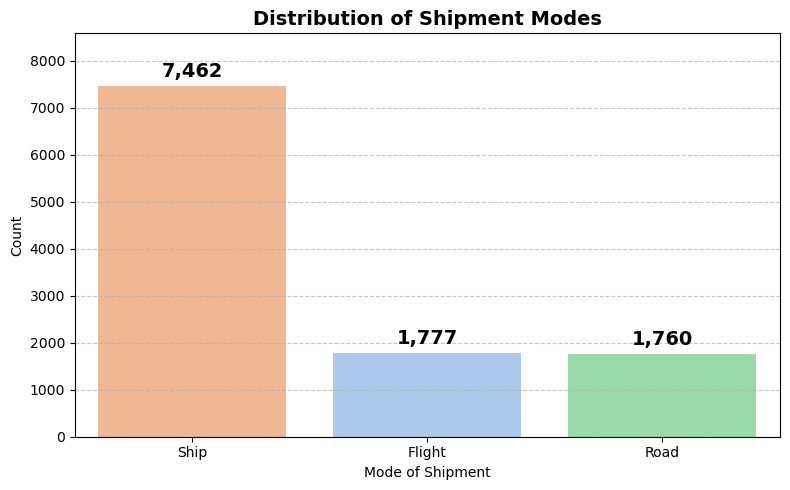


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Mode of Shipment

**Total Orders:** <span style="color: #495057; font-weight: bold;">10,999</span>

**Distribution:**
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Ship**</span>: 7,462 (67.8%)
- <span style="color: #495057;">**Flight**</span>: 1,777 (16.2%)
- <span style="color: #495057;">**Road**</span>: 1,760 (16.0%)

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Key Finding:</strong> Ship is the dominant method, representing over two-thirds of all shipments.
</div>

</div>


In [3]:
# --- Calculate the distribution of shipment modes ---
shipment_counts = dataset['mode_of_shipment'].value_counts()
shipment_order = shipment_counts.index.tolist()
max_count = shipment_counts.max()

# --- Plot the distribution as a bar chart ---
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=dataset,
    x='mode_of_shipment',
    hue='mode_of_shipment',
    order=shipment_order,
    palette='pastel',
    legend=False
)
plt.title('Distribution of Shipment Modes', fontsize=14, fontweight='bold')
plt.xlabel('Mode of Shipment')
plt.ylabel('Count')

# Annotate each bar with its count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,.0f}",
        (p.get_x() + p.get_width() / 2, height + 100),
        ha='center', va='bottom', fontsize=14, fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max_count * 1.15)
plt.tight_layout()
plt.show()

# --- Generate markdown summary ---
summary = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Mode of Shipment

**Total Orders:** <span style="color: #495057; font-weight: bold;">{len(dataset):,}</span>

**Distribution:**
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**{shipment_order[0]}**</span>: {shipment_counts.iloc[0]:,} ({shipment_counts.iloc[0]/len(dataset)*100:.1f}%)
- <span style="color: #495057;">**{shipment_order[1]}**</span>: {shipment_counts.iloc[1]:,} ({shipment_counts.iloc[1]/len(dataset)*100:.1f}%)
- <span style="color: #495057;">**{shipment_order[2]}**</span>: {shipment_counts.iloc[2]:,} ({shipment_counts.iloc[2]/len(dataset)*100:.1f}%)

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Key Finding:</strong> {shipment_order[0]} is the dominant method, representing over two-thirds of all shipments.
</div>

</div>
"""

display(Markdown(summary))

### Histogram 'On-time delivery' 

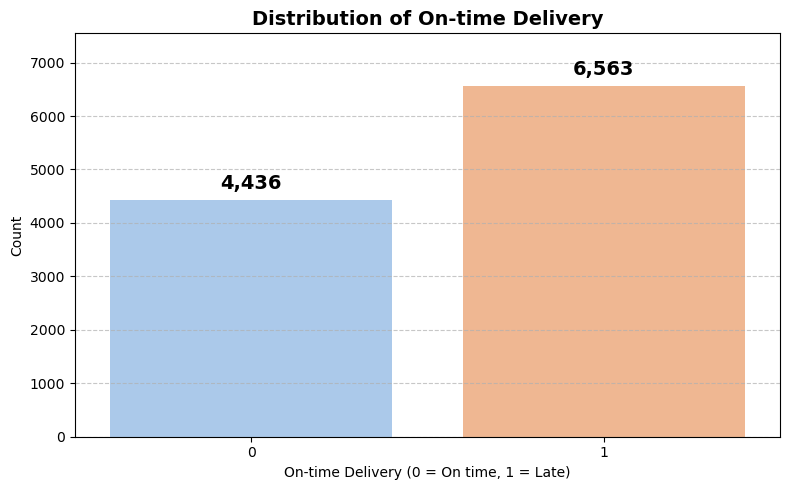


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## On-time Delivery

**Total Orders Analyzed:** <span style="color: #495057; font-weight: bold;">10,999</span>

**Key Insights:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-time (0)**</span> deliveries: <span style="color: #495057; font-weight: bold;">4,436</span> orders (<span style="color: #495057; font-weight: bold;">40.3%</span> of total)
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late (1)**   </span> deliveries: <span style="color: #495057; font-weight: bold;">6,563</span> orders (<span style="color: #495057; font-weight: bold;">59.7%</span> of total)

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
The data shows that approximately <span style="color: #343a40; font-weight: bold;">59.7%</span> of orders were not delivered on time.
</div>

</div>


In [4]:
# --- Calculate the distribution of on-time delivery status ---
delivery_counts = dataset['on_time_delivery'].value_counts()
delivery_order = sorted(delivery_counts.index.tolist())
max_delivery = delivery_counts.max()

# --- Plot the distribution as a bar chart ---
plt.figure(figsize=(8, 5))
ax = sns.countplot(
    data=dataset,
    x='on_time_delivery',
    hue='on_time_delivery',
    order=delivery_order,
    palette='pastel',
    legend=False
)
plt.title('Distribution of On-time Delivery', fontsize=14, fontweight='bold')
plt.xlabel('On-time Delivery (0 = On time, 1 = Late)')
plt.ylabel('Count')

# Annotate each bar with its count
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,.0f}",
        (p.get_x() + p.get_width() / 2, height + max_delivery * 0.02),
        ha='center', va='bottom', fontsize=14, fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max_delivery * 1.15)
plt.tight_layout()
plt.show()

# --- Generate markdown summary ---
on_time_count = delivery_counts.get(0, 0)
late_count = delivery_counts.get(1, 0)

summary = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## On-time Delivery

**Total Orders Analyzed:** <span style="color: #495057; font-weight: bold;">{len(dataset):,}</span>

**Key Insights:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-time (0)**</span> deliveries: <span style="color: #495057; font-weight: bold;">{on_time_count:,}</span> orders (<span style="color: #495057; font-weight: bold;">{on_time_count/len(dataset)*100:.1f}%</span> of total)
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late (1)**   </span> deliveries: <span style="color: #495057; font-weight: bold;">{late_count:,}</span> orders (<span style="color: #495057; font-weight: bold;">{late_count/len(dataset)*100:.1f}%</span> of total)

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
The data shows that approximately <span style="color: #343a40; font-weight: bold;">{late_count/len(dataset)*100:.1f}%</span> of orders were not delivered on time.
</div>

</div>
"""

display(Markdown(summary))

### Histogram 'Cost of the product' 

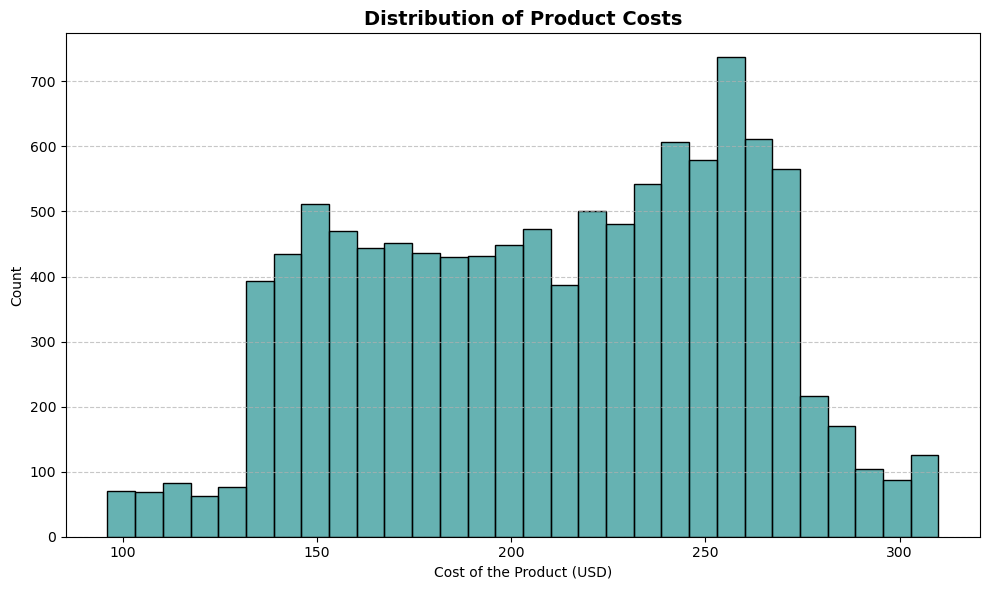


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Cost of the Product

**Orders Analyzed:** <span style="color: #495057; font-weight: bold;">10,999</span>

**Price Range:**
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Range**</span>: <span style="color: #495057; font-weight: bold;">USD 96.00 - USD 310.00</span>
- <span style="color: #495057;">**Average**</span>: <span style="color: #495057; font-weight: bold;">USD 210.20</span>
- <span style="color: #495057;">**Median**</span>: <span style="color: #495057; font-weight: bold;">USD 214.00</span>

**Price Spread:**
- <span style="color: #495057;">**25% of products**</span> cost <span style="color: #495057; font-weight: bold;">USD 169.00</span> or less
- <span style="color: #495057;">**50% of products**</span> cost between <span style="color: #495057; font-weight: bold;">USD 169.00 - USD 251.00</span>
- <span style="color: #495057;">**25% of products**</span> cost <span style="color: #495057; font-weight: bold;">USD 251.00</span> or more

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Key Insights:</strong> Product costs show a wide range from USD 96.00 to USD 310.00, with most products clustered around the USD 210.20 average price point.
</div>

</div>


In [5]:
# --- Calculate distribution of cost of the product ---
cost_stats = dataset['cost_of_the_product'].describe()

# --- Plot histogram ---
plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=dataset,
    x='cost_of_the_product',
    bins=30,
    color='teal',
    alpha=0.6,
    kde=False
)
plt.title('Distribution of Product Costs', fontsize=14, fontweight='bold')
plt.xlabel('Cost of the Product (USD)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Generate markdown summary ---
q1 = cost_stats['25%']
q3 = cost_stats['75%']

summary = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Cost of the Product

**Orders Analyzed:** <span style="color: #495057; font-weight: bold;">{len(dataset):,}</span>

**Price Range:**
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Range**</span>: <span style="color: #495057; font-weight: bold;">USD {cost_stats['min']:.2f} - USD {cost_stats['max']:.2f}</span>
- <span style="color: #495057;">**Average**</span>: <span style="color: #495057; font-weight: bold;">USD {cost_stats['mean']:.2f}</span>
- <span style="color: #495057;">**Median**</span>: <span style="color: #495057; font-weight: bold;">USD {cost_stats['50%']:.2f}</span>

**Price Spread:**
- <span style="color: #495057;">**25% of products**</span> cost <span style="color: #495057; font-weight: bold;">USD {q1:.2f}</span> or less
- <span style="color: #495057;">**50% of products**</span> cost between <span style="color: #495057; font-weight: bold;">USD {q1:.2f} - USD {q3:.2f}</span>
- <span style="color: #495057;">**25% of products**</span> cost <span style="color: #495057; font-weight: bold;">USD {q3:.2f}</span> or more

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Key Insights:</strong> Product costs show a wide range from USD {cost_stats['min']:.2f} to USD {cost_stats['max']:.2f}, with most products clustered around the USD {cost_stats['mean']:.2f} average price point.
</div>

</div>
"""

display(Markdown(summary))

## Task 2 

The company also wants to know which mode of shipment is most reliable. Calculate the share of on-time delivery for each mode of shipment using python and print the results.

**Hint:** Have a look at indexing and selecting data with pandas to filter the required rows and columns from the dataset: \
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

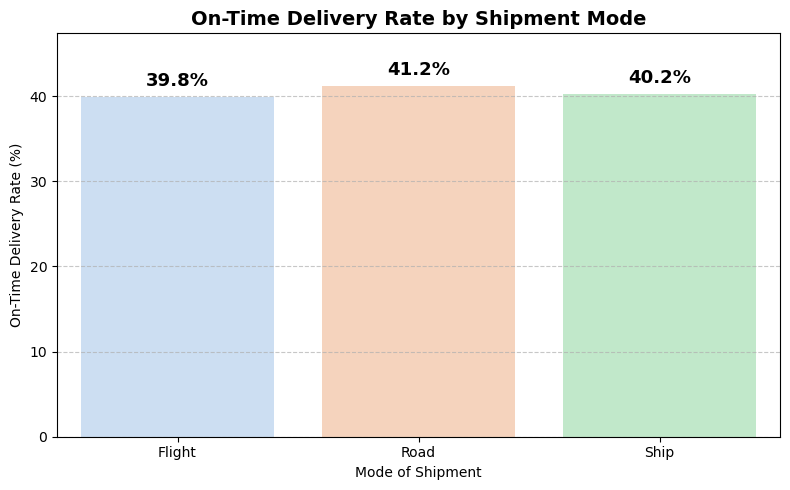


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## On-Time Delivery by Shipment Mode

**Analysis Results:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Road**</span> achieved the highest on-time delivery rate (<span style="color: #495057; font-weight: bold;">41.2%</span>)
- <span style="color: #495057;">**Ship**</span> had <span style="color: #495057; font-weight: bold;">40.2%</span> on-time delivery rate
- <span style="color: #495057;">**Flight**</span> had <span style="color: #495057; font-weight: bold;">39.8%</span> on-time delivery rate

**Detailed Results:**

<table style="border-collapse: collapse; width: 100%; margin-top: 15px;"><tr style="background-color: #e9ecef;"><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Mode</th><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Total Orders</th><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">On-Time Deliveries</th><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">On-Time Rate (%)</th></tr><tr><td style="padding: 8px; border: 1px solid #ddd;">Flight</td><td style="padding: 8px; border: 1px solid #ddd;">1,777</td><td style="padding: 8px; border: 1px solid #ddd;">708</td><td style="padding: 8px; border: 1px solid #ddd;">39.8%</td></tr><tr style="background-color: #d4edda;"><td style="padding: 8px; border: 1px solid #ddd;"><strong>Road</strong></td><td style="padding: 8px; border: 1px solid #ddd;">1,760</td><td style="padding: 8px; border: 1px solid #ddd;">725</td><td style="padding: 8px; border: 1px solid #ddd;"><strong>41.2%</strong></td></tr><tr><td style="padding: 8px; border: 1px solid #ddd;">Ship</td><td style="padding: 8px; border: 1px solid #ddd;">7,462</td><td style="padding: 8px; border: 1px solid #ddd;">3,003</td><td style="padding: 8px; border: 1px solid #ddd;">40.2%</td></tr></table>

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Key Finding:</strong> Road is the most reliable shipment mode with 41.2% on-time delivery rate.
</div>

</div>


In [6]:
# --- Calculate reliability for each mode of shipment ---
reliability = (
    dataset.groupby('mode_of_shipment')['on_time_delivery']
    .agg(['count', 'sum'])
    .rename(columns={'count': 'Total Orders', 'sum': 'Late Deliveries'})
)
reliability['On-Time Deliveries'] = reliability['Total Orders'] - reliability['Late Deliveries']
reliability['On-Time Rate (%)'] = (reliability['On-Time Deliveries'] / reliability['Total Orders']) * 100

# --- Plot bar chart ---
bar_df = reliability.reset_index().copy()
bar_df['On-Time Rate (%)'] = bar_df['On-Time Rate (%)'].round(2)

plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=bar_df,
    x='mode_of_shipment',
    y='On-Time Rate (%)',
    hue='mode_of_shipment',
    palette='pastel',
    legend=False,
    alpha=0.6
)
plt.title('On-Time Delivery Rate by Shipment Mode', fontsize=14, fontweight='bold')
plt.xlabel('Mode of Shipment')
plt.ylabel('On-Time Delivery Rate (%)')

# Annotate bars
max_rate = bar_df['On-Time Rate (%)'].max()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.1f}%",
        (p.get_x() + p.get_width() / 2, height + max_rate * 0.02),
        ha='center', va='bottom', fontsize=13, fontweight='bold'
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, max_rate * 1.15)
plt.tight_layout()
plt.show()

# --- Generate markdown summary ---
ordered = reliability['On-Time Rate (%)'].sort_values(ascending=False)
top_modes = ordered.index.tolist()
top_rates = ordered.values
max_idx = reliability['On-Time Rate (%)'].idxmax()

# Create highlighted table
table_rows = ""
for idx, row in reliability.iterrows():
    if idx == max_idx:
        table_rows += f"""<tr style="background-color: #d4edda;"><td style="padding: 8px; border: 1px solid #ddd;"><strong>{idx}</strong></td><td style="padding: 8px; border: 1px solid #ddd;">{int(row['Total Orders']):,}</td><td style="padding: 8px; border: 1px solid #ddd;">{int(row['On-Time Deliveries']):,}</td><td style="padding: 8px; border: 1px solid #ddd;"><strong>{row['On-Time Rate (%)']:.1f}%</strong></td></tr>"""
    else:
        table_rows += f"""<tr><td style="padding: 8px; border: 1px solid #ddd;">{idx}</td><td style="padding: 8px; border: 1px solid #ddd;">{int(row['Total Orders']):,}</td><td style="padding: 8px; border: 1px solid #ddd;">{int(row['On-Time Deliveries']):,}</td><td style="padding: 8px; border: 1px solid #ddd;">{row['On-Time Rate (%)']:.1f}%</td></tr>"""

summary = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## On-Time Delivery by Shipment Mode

**Analysis Results:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**{top_modes[0]}**</span> achieved the highest on-time delivery rate (<span style="color: #495057; font-weight: bold;">{top_rates[0]:.1f}%</span>)
- <span style="color: #495057;">**{top_modes[1]}**</span> had <span style="color: #495057; font-weight: bold;">{top_rates[1]:.1f}%</span> on-time delivery rate
- <span style="color: #495057;">**{top_modes[2]}**</span> had <span style="color: #495057; font-weight: bold;">{top_rates[2]:.1f}%</span> on-time delivery rate

**Detailed Results:**

<table style="border-collapse: collapse; width: 100%; margin-top: 15px;"><tr style="background-color: #e9ecef;"><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Mode</th><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">Total Orders</th><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">On-Time Deliveries</th><th style="padding: 10px; border: 1px solid #ddd; text-align: left;">On-Time Rate (%)</th></tr>{table_rows}</table>

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Key Finding:</strong> {top_modes[0]} is the most reliable shipment mode with {top_rates[0]:.1f}% on-time delivery rate.
</div>

</div>
"""

display(Markdown(summary))

## Task 3

Implement an artificial neural network that predicts if an order will be delivered on time or not using PyTorch. Use the approach from the video tutorial “Multivariate Regression with Artificial Neural Networks” as an inspiration. Train the neural network on a training set and evaluate it on a test set. Plot the loss and accuracy history. Discuss the results of your neural network.

**Hint 1:** The bike sharing dataset from the tutorial was a regression problem because the target variable could output all positive integer values. The e-commerce shipping dataset has only two possible outcomes, namely 0 and 1. Therefore, it is called a binary classification problem. Neural networks for this kind of problem often use a sigmoid activation function after the output layer to map the output to the interval (0;1). In addition, the binary cross entropy loss function is usually used. Have a look at the following article as a short introduction to binary cross entropy and use google for further information. \
https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/binary-crossentropy

**Hint 2:** Contrary to the bike sharing dataset, the e-commerce shipping dataset does not only include numerical features but also so-called categorical features. These can only take on a limited, fixed number of possible values. The mode of shipment for instance has only three possible values which are ship, flight or road. You can use the pandas call “pd.get_dummies” to apply one-hot encoding to the categorical features. Have a look at the following article as a short introduction to one-hot encoding. \
https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

**Hint 3:** You can either use the manual training process as in the tutorial or you can use the data loader of Torch. The data loader automatically prepares the dataset by shuffling and creating batches. Have a look at the Torch tutorials.

### Preprocessing and One-Hot Encoding 


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Unique Values in Each Categorical Column

Identification of non-numerical (categorical) columns: <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**warehouse_block, mode_of_shipment, product_importance**</span>.

**Unique values are:**  
- **warehouse_block**: ['D', 'F', 'A', 'B', 'C']
- **mode_of_shipment**: ['Flight', 'Ship', 'Road']
- **product_importance**: ['low', 'medium', 'high']

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Target Variable Distribution

The distribution of the target variable <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**on_time_delivery**</span> was analyzed to assess balance, which informs the sampling strategy and evaluation methods.

</div>


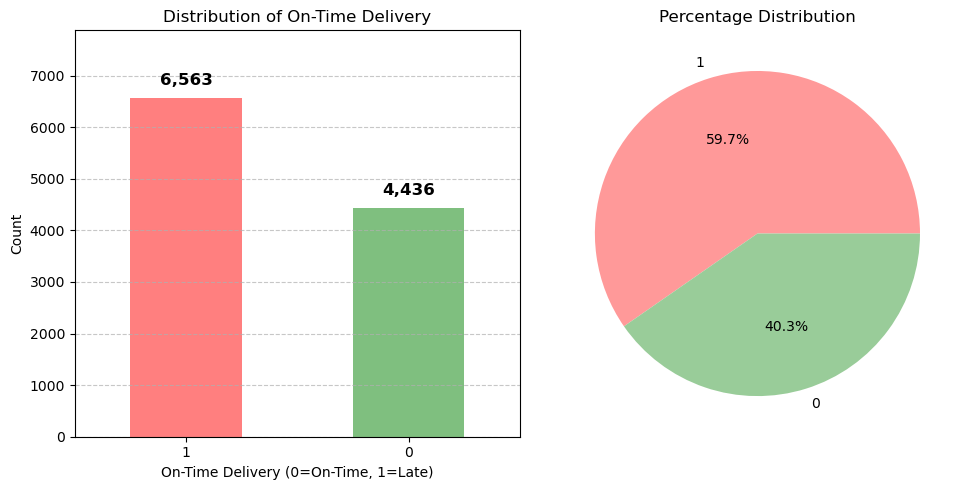


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

**Distribution details:**  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**40.33%**</span> on-time deliveries  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**59.67%**</span> late deliveries  

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
Based on this imbalance, <strong>stratified sampling will be applied</strong> during the train-test split to preserve the original class distribution.
</div>

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Feature and Target Shapes

The dataset contains <span style="color: #495057; font-weight: bold;">10999</span> samples and <span style="color: #495057; font-weight: bold;">9</span> features.

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## One-Hot Encoding: Shape and Encoded Columns

One-hot encoding expanded the feature space from <span style="color: #495057; font-weight: bold;">9</span> to <span style="color: #495057; font-weight: bold;">17</span> features, by converting <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**3 categorical columns**</span> into **binary variables**.

**Encoded columns include:** customer_care_calls, customer_rating, cost_of_the_product, prior_purchases, discount offered, weight, warehouse_block_A, warehouse_block_B, warehouse_block_C, warehouse_block_D, warehouse_block_F, mode_of_shipment_Flight, mode_of_shipment_Road, mode_of_shipment_Ship, product_importance_high, product_importance_low, product_importance_medium

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Correlation Matrix

</div>


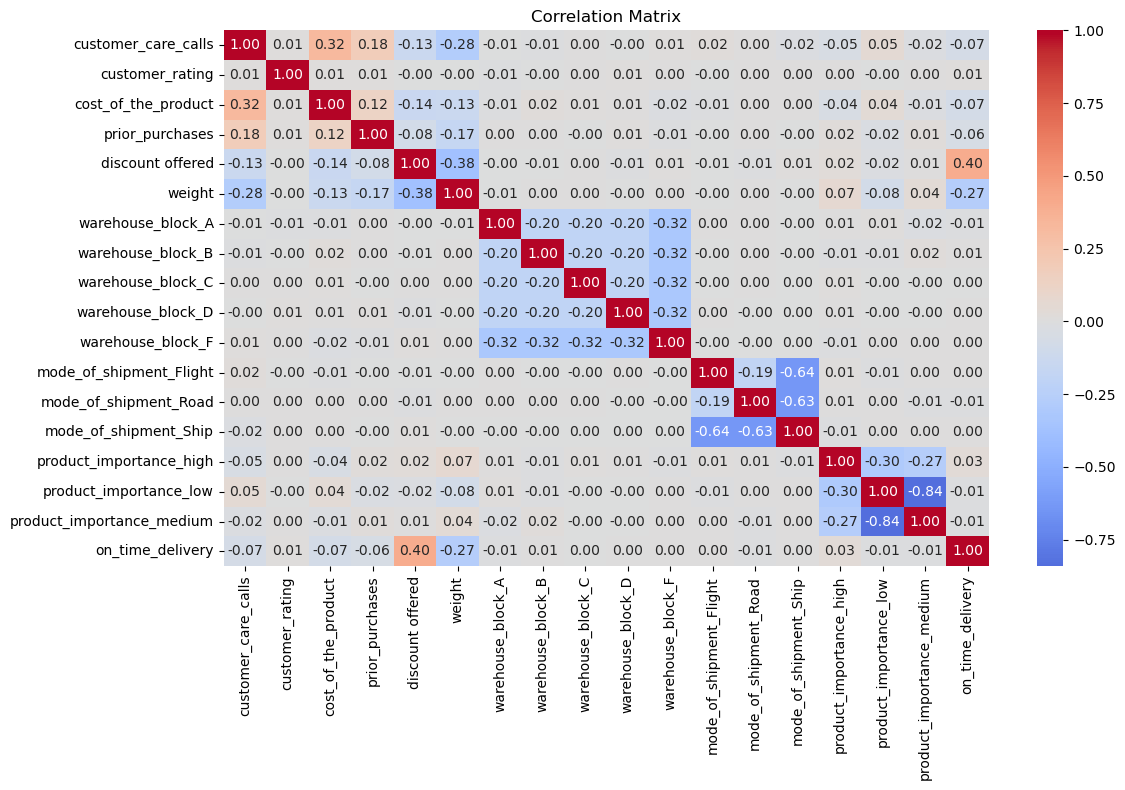


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

The correlation matrix was computed dynamically to evaluate relationships among features and the target variable <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**on_time_delivery**</span>.  

**Key Correlations:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**discount offered**</span>: <span style="color: #495057; font-weight: bold;">0.40</span> (strongest positive)
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**weight**</span>: <span style="color: #495057; font-weight: bold;">-0.27</span> (strongest negative)

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Feature Selection Decision:</strong> All features are retained for training to allow the neural network to learn from the full input space, including nonlinear patterns that correlation analysis may not capture.
</div>

While selecting only the most dominant features based on correlation could reduce input dimensionality and potentially improve training speed, it remains uncertain whether this would improve prediction accuracy. Less correlated features may still contain valuable nonlinear information.

Therefore, the full feature set is considered to maximize learning potential.

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Feature Scaling

Features exhibit varying value ranges, which can negatively impact model training. To address this, <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**MinMaxScaler**</span> was applied to scale all features to the <span style="color: #495057; font-weight: bold;">[0, 1]</span> interval, ensuring uniform influence during model convergence.

The scaled feature set maintains a shape of <span style="color: #495057; font-weight: bold;">(10999, 17)</span>.

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Train/Test Split

<span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Stratified sampling was applied**</span> to maintain the original class distribution in both training and testing datasets.  

**Training set shape:** X_train = <span style="color: #495057; font-weight: bold;">(8799, 17)</span>, y_train = <span style="color: #495057; font-weight: bold;">(8799,)</span>  
**Testing set shape:** X_test = <span style="color: #495057; font-weight: bold;">(2200, 17)</span>, y_test = <span style="color: #495057; font-weight: bold;">(2200,)</span>

This ensures balanced model evaluation and helps prevent biased performance estimates.

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Class Distribution in Training and Test Sets

The class distributions in both training and test sets were examined to validate the stratified sampling approach:

**Training set:**  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-time (0)**</span>: <span style="color: #495057; font-weight: bold;">40.33%</span>  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late (1)**</span>: <span style="color: #495057; font-weight: bold;">59.67%</span>

**Test set:**  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-time (0)**</span>: <span style="color: #495057; font-weight: bold;">40.32%</span>  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late (1)**</span>: <span style="color: #495057; font-weight: bold;">59.68%</span>

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
The close similarity in percentages between the two sets confirms representative sampling and balanced class proportions.
</div>

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Conversion to PyTorch Tensors

The preprocessed features and target variables were converted into <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**PyTorch tensors**</span> to enable model training within deep learning frameworks.

**Tensor shapes:**  
- X_train_tensor: <span style="color: #495057; font-weight: bold;">torch.Size([8799, 17])</span>  
- y_train_tensor: <span style="color: #495057; font-weight: bold;">torch.Size([8799])</span>  
- X_test_tensor: <span style="color: #495057; font-weight: bold;">torch.Size([2200, 17])</span>  
- y_test_tensor: <span style="color: #495057; font-weight: bold;">torch.Size([2200])</span>

</div>


In [7]:
# 1. Detect categorical columns and show unique values
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
unique_vals_text = "\n".join([f"- **{col}**: {list(dataset[col].unique())}" for col in categorical_columns])

categorical_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Unique Values in Each Categorical Column

Identification of non-numerical (categorical) columns: <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**{', '.join(categorical_columns)}**</span>.

**Unique values are:**  
{unique_vals_text}

</div>
"""
display(Markdown(categorical_md))

# 2. Visualize target variable distribution (bar + pie)
display(Markdown("""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Target Variable Distribution

The distribution of the target variable <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**on_time_delivery**</span> was analyzed to assess balance, which informs the sampling strategy and evaluation methods.

</div>
"""))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = dataset['on_time_delivery'].value_counts().plot(kind='bar', color=['red', 'green'], alpha=0.5)
max_delivery = dataset['on_time_delivery'].value_counts().max()
plt.title('Distribution of On-Time Delivery')
plt.xlabel('On-Time Delivery (0=On-Time, 1=Late)')
plt.ylabel('Count')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:,}",
        (p.get_x() + p.get_width() / 2, height + max_delivery * 0.03),
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )
ax.set_ylim(0, max_delivery * 1.20)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='x', visible=False)
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
pie_colors = ['#ff9999', '#99cc99']
dataset['on_time_delivery'].value_counts(normalize=True).plot(
    kind='pie', autopct='%1.1f%%', colors=pie_colors
)
plt.title('Percentage Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

target_counts = dataset['on_time_delivery'].value_counts(normalize=True)
on_time_pct = target_counts.get(0, 0) * 100
late_pct = target_counts.get(1, 0) * 100

target_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

**Distribution details:**  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**{on_time_pct:.2f}%**</span> on-time deliveries  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**{late_pct:.2f}%**</span> late deliveries  

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
Based on this imbalance, <strong>stratified sampling will be applied</strong> during the train-test split to preserve the original class distribution.
</div>

</div>
"""
display(Markdown(target_md))

# 3. Separate features and target, print shapes dynamically
X = dataset.drop('on_time_delivery', axis=1)
y = dataset['on_time_delivery']

shape_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Feature and Target Shapes

The dataset contains <span style="color: #495057; font-weight: bold;">{X.shape[0]}</span> samples and <span style="color: #495057; font-weight: bold;">{X.shape[1]}</span> features.

</div>
"""
display(Markdown(shape_md))

# 4. One-hot encode categorical features
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=False)
encoded_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## One-Hot Encoding: Shape and Encoded Columns

One-hot encoding expanded the feature space from <span style="color: #495057; font-weight: bold;">{X.shape[1]}</span> to <span style="color: #495057; font-weight: bold;">{X_encoded.shape[1]}</span> features, by converting <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**{len(categorical_columns)} categorical columns**</span> into **binary variables**.

**Encoded columns include:** {', '.join(X_encoded.columns)}

</div>
"""
display(Markdown(encoded_md))

# 5. Correlation matrix visualization
display(Markdown("""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Correlation Matrix

</div>
"""))

plt.figure(figsize=(12, 8))
correlation_matrix = pd.concat([X_encoded, y], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Extract correlation values of features with target variable
target_corr = correlation_matrix['on_time_delivery'].drop('on_time_delivery')
max_corr_feature = target_corr.idxmax()
max_corr_value = target_corr.max()
min_corr_feature = target_corr.idxmin()
min_corr_value = target_corr.min()

corr_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

The correlation matrix was computed dynamically to evaluate relationships among features and the target variable <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**on_time_delivery**</span>.  

**Key Correlations:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**{max_corr_feature}**</span>: <span style="color: #495057; font-weight: bold;">{max_corr_value:.2f}</span> (strongest positive)
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**{min_corr_feature}**</span>: <span style="color: #495057; font-weight: bold;">{min_corr_value:.2f}</span> (strongest negative)

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Feature Selection Decision:</strong> All features are retained for training to allow the neural network to learn from the full input space, including nonlinear patterns that correlation analysis may not capture.
</div>

While selecting only the most dominant features based on correlation could reduce input dimensionality and potentially improve training speed, it remains uncertain whether this would improve prediction accuracy. Less correlated features may still contain valuable nonlinear information.

Therefore, the full feature set is considered to maximize learning potential.

</div>
"""
display(Markdown(corr_md))

# 6. Feature scaling (MinMaxScaler)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_encoded.columns)

scaling_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Feature Scaling

Features exhibit varying value ranges, which can negatively impact model training. To address this, <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**MinMaxScaler**</span> was applied to scale all features to the <span style="color: #495057; font-weight: bold;">[0, 1]</span> interval, ensuring uniform influence during model convergence.

The scaled feature set maintains a shape of <span style="color: #495057; font-weight: bold;">{X_scaled_df.shape}</span>.

</div>
"""
display(Markdown(scaling_md))

# 7. Train/test split (stratified sampling)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

split_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Train/Test Split

<span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Stratified sampling was applied**</span> to maintain the original class distribution in both training and testing datasets.  

**Training set shape:** X_train = <span style="color: #495057; font-weight: bold;">{X_train.shape}</span>, y_train = <span style="color: #495057; font-weight: bold;">{y_train.shape}</span>  
**Testing set shape:** X_test = <span style="color: #495057; font-weight: bold;">{X_test.shape}</span>, y_test = <span style="color: #495057; font-weight: bold;">{y_test.shape}</span>

This ensures balanced model evaluation and helps prevent biased performance estimates.

</div>
"""
display(Markdown(split_md))

# 8. Class distribution in train and test sets
train_dist = pd.Series(y_train).value_counts(normalize=True) * 100
test_dist = pd.Series(y_test).value_counts(normalize=True) * 100

class_dist_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Class Distribution in Training and Test Sets

The class distributions in both training and test sets were examined to validate the stratified sampling approach:

**Training set:**  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-time (0)**</span>: <span style="color: #495057; font-weight: bold;">{train_dist.get(0, 0):.2f}%</span>  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late (1)**</span>: <span style="color: #495057; font-weight: bold;">{train_dist.get(1, 0):.2f}%</span>

**Test set:**  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-time (0)**</span>: <span style="color: #495057; font-weight: bold;">{test_dist.get(0, 0):.2f}%</span>  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late (1)**</span>: <span style="color: #495057; font-weight: bold;">{test_dist.get(1, 0):.2f}%</span>

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
The close similarity in percentages between the two sets confirms representative sampling and balanced class proportions.
</div>

</div>
"""
display(Markdown(class_dist_md))

# 9. Convert features and targets to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.FloatTensor(np.array(y_train))
y_test_tensor = torch.FloatTensor(np.array(y_test))

tensor_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Conversion to PyTorch Tensors

The preprocessed features and target variables were converted into <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**PyTorch tensors**</span> to enable model training within deep learning frameworks.

**Tensor shapes:**  
- X_train_tensor: <span style="color: #495057; font-weight: bold;">{X_train_tensor.shape}</span>  
- y_train_tensor: <span style="color: #495057; font-weight: bold;">{y_train_tensor.shape}</span>  
- X_test_tensor: <span style="color: #495057; font-weight: bold;">{X_test_tensor.shape}</span>  
- y_test_tensor: <span style="color: #495057; font-weight: bold;">{y_test_tensor.shape}</span>

</div>
"""
display(Markdown(tensor_md))

# 10. Set seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

## Network Architecture 

In [8]:
# 1. FIRST: Define the DeliveryPredictor class
class DeliveryPredictor(nn.Module):
    def __init__(self, input_size):
        super(DeliveryPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc5(x))
        return x

# 2. SECOND: Set device and create model instance
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = X_train_tensor.shape[1]
model = DeliveryPredictor(input_size).to(device)

# 3. THIRD: Display the markdown with model summary
network_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Neural Network Architecture

A fully connected feedforward neural network was implemented to predict delivery status.  

**Architecture Overview:**
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**5 linear layers**</span> with decreasing neuron counts
- Input size: <span style="color: #495057; font-weight: bold;">{X_train_tensor.shape[1]} features</span>
- Output: <span style="color: #495057; font-weight: bold;">Single binary classification node</span>

**Layer Configuration:**
- **Layer 1:** <span style="color: #495057; font-weight: bold;">{X_train_tensor.shape[1]} → 128</span> neurons (feature expansion)
- **Layer 2:** <span style="color: #495057; font-weight: bold;">128 → 64</span> neurons
- **Layer 3:** <span style="color: #495057; font-weight: bold;">64 → 32</span> neurons  
- **Layer 4:** <span style="color: #495057; font-weight: bold;">32 → 16</span> neurons
- **Layer 5:** <span style="color: #495057; font-weight: bold;">16 → 1</span> neuron (output)

**Activation & Regularization:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**ReLU activation**</span> for hidden layers
- <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**Dropout (0.2)**</span> after each hidden layer
- <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Sigmoid activation**</span> for output layer

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Design Rationale:</strong> This architecture balances model complexity and regularization, allowing effective learning from the available features while mitigating overfitting through progressive dimensionality reduction.
</div>

### Model Summary:

```
{model}
```

</div>
"""
display(Markdown(network_md))


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Neural Network Architecture

A fully connected feedforward neural network was implemented to predict delivery status.  

**Architecture Overview:**
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**5 linear layers**</span> with decreasing neuron counts
- Input size: <span style="color: #495057; font-weight: bold;">17 features</span>
- Output: <span style="color: #495057; font-weight: bold;">Single binary classification node</span>

**Layer Configuration:**
- **Layer 1:** <span style="color: #495057; font-weight: bold;">17 → 128</span> neurons (feature expansion)
- **Layer 2:** <span style="color: #495057; font-weight: bold;">128 → 64</span> neurons
- **Layer 3:** <span style="color: #495057; font-weight: bold;">64 → 32</span> neurons  
- **Layer 4:** <span style="color: #495057; font-weight: bold;">32 → 16</span> neurons
- **Layer 5:** <span style="color: #495057; font-weight: bold;">16 → 1</span> neuron (output)

**Activation & Regularization:**
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**ReLU activation**</span> for hidden layers
- <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**Dropout (0.2)**</span> after each hidden layer
- <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Sigmoid activation**</span> for output layer

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Design Rationale:</strong> This architecture balances model complexity and regularization, allowing effective learning from the available features while mitigating overfitting through progressive dimensionality reduction.
</div>

### Model Summary:

```
DeliveryPredictor(
  (fc1): Linear(in_features=17, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=16, bias=True)
  (fc5): Linear(in_features=16, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (dropout): Dropout(p=0.2, inplace=False)
)
```

</div>


## Training 

**Hint 3:** The binary cross entropy loss function works well for training, but it is not helpful for interpreting the prediction performance. Therefore, you can use the accuracy as an additional metric in the training process. The accuracy describes the percentage of correct predictions. Use the pre-defined function “binary_acc” from the template to evaluate the accuracy in each epoch while training.

In [9]:
def binary_acc(predictions, labels):
    prediction_tag = torch.round(predictions)

    correct_results_sum = (prediction_tag == labels).sum().float()
    acc = correct_results_sum / labels.shape[0]
    
    return acc

In [10]:
# Display training setup information
training_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Model Training Setup

**Loss Function & Optimizer:**
- <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Binary Cross-Entropy Loss (BCELoss)**</span> for binary classification
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Adam Optimizer**</span> with learning rate <span style="color: #495057; font-weight: bold;">0.001</span>
- Weight decay: <span style="color: #495057; font-weight: bold;">1e-4</span> for regularization

**Learning Rate Scheduling:**
- <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**StepLR Scheduler**</span> reduces learning rate by factor <span style="color: #495057; font-weight: bold;">0.8</span> every <span style="color: #495057; font-weight: bold;">50 epochs</span>

**Training Configuration:**
- Training epochs: <span style="color: #495057; font-weight: bold;">{400}</span>
- Progress logging: Every <span style="color: #495057; font-weight: bold;">20 epochs</span>
- Computation device: <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**{'GPU' if torch.cuda.is_available() else 'CPU'}**</span>

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Monitoring:</strong> Training and testing loss and accuracy are recorded each epoch, with progress logged every 20 epochs including current learning rate.
</div>

</div>
"""
display(Markdown(training_md))

# Required accuracy function (as provided)
def binary_acc(predictions, labels):
    prediction_tag = torch.round(predictions)
    correct_results_sum = (prediction_tag == labels).sum().float()
    acc = correct_results_sum / labels.shape[0]
    return acc

# Training setup
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.8)

# Move tensors to device
X_train_tensor = X_train_tensor.to(device)
y_train_tensor = y_train_tensor.to(device)
X_test_tensor = X_test_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

def train_model(model, X_train, y_train, X_test, y_test, epochs=400):
    train_losses, train_accs, test_losses, test_accs = [], [], [], []
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train.unsqueeze(1))
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Use binary_acc function - flatten outputs for dimension matching
        train_acc = binary_acc(outputs.squeeze(), y_train)
        
        # Evaluation phase
        model.eval()
        with torch.no_grad():
            test_outputs = model(X_test)
            test_loss = criterion(test_outputs, y_test.unsqueeze(1))
            # Use binary_acc function - flatten outputs for dimension matching
            test_acc = binary_acc(test_outputs.squeeze(), y_test)
        
        # Record metrics (convert tensor to item for storage)
        train_losses.append(loss.item())
        train_accs.append(train_acc.item())
        test_losses.append(test_loss.item())
        test_accs.append(test_acc.item())
        
        scheduler.step()
        
        # Progress logging
        if (epoch + 1) % 20 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}]')
            print(f'Train Loss: {loss.item():.4f}, Train Acc: {train_acc.item():.4f}')
            print(f'Test Loss: {test_loss.item():.4f}, Test Acc: {test_acc.item():.4f}')
            print(f'Learning Rate: {scheduler.get_last_lr()[0]:.6f}')
            print('-' * 50)
    
    return train_losses, train_accs, test_losses, test_accs

# Start training
train_losses, train_accs, test_losses, test_accs = train_model(
    model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, epochs=400
)


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Model Training Setup

**Loss Function & Optimizer:**
- <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Binary Cross-Entropy Loss (BCELoss)**</span> for binary classification
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Adam Optimizer**</span> with learning rate <span style="color: #495057; font-weight: bold;">0.001</span>
- Weight decay: <span style="color: #495057; font-weight: bold;">1e-4</span> for regularization

**Learning Rate Scheduling:**
- <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**StepLR Scheduler**</span> reduces learning rate by factor <span style="color: #495057; font-weight: bold;">0.8</span> every <span style="color: #495057; font-weight: bold;">50 epochs</span>

**Training Configuration:**
- Training epochs: <span style="color: #495057; font-weight: bold;">400</span>
- Progress logging: Every <span style="color: #495057; font-weight: bold;">20 epochs</span>
- Computation device: <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**CPU**</span>

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Monitoring:</strong> Training and testing loss and accuracy are recorded each epoch, with progress logged every 20 epochs including current learning rate.
</div>

</div>


Epoch [20/400]
Train Loss: 0.6735, Train Acc: 0.5956
Test Loss: 0.6717, Test Acc: 0.5968
Learning Rate: 0.001000
--------------------------------------------------
Epoch [40/400]
Train Loss: 0.6547, Train Acc: 0.5972
Test Loss: 0.6498, Test Acc: 0.5968
Learning Rate: 0.001000
--------------------------------------------------
Epoch [60/400]
Train Loss: 0.5978, Train Acc: 0.6012
Test Loss: 0.5870, Test Acc: 0.6000
Learning Rate: 0.000800
--------------------------------------------------
Epoch [80/400]
Train Loss: 0.5518, Train Acc: 0.6443
Test Loss: 0.5426, Test Acc: 0.6518
Learning Rate: 0.000800
--------------------------------------------------
Epoch [100/400]
Train Loss: 0.5396, Train Acc: 0.6536
Test Loss: 0.5325, Test Acc: 0.6559
Learning Rate: 0.000640
--------------------------------------------------
Epoch [120/400]
Train Loss: 0.5339, Train Acc: 0.6589
Test Loss: 0.5306, Test Acc: 0.6586
Learning Rate: 0.000640
--------------------------------------------------
Epoch [140/400

## Evaluation

In [11]:
# Evaluation introduction markdown
eval_md = """
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

# Model Evaluation

After training, the model was evaluated on the test set to assess its generalization performance.

**Performance Metrics:**
- The <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**final test accuracy**</span> achieved was dynamically calculated from the predictions  
- The <span style="color: #495057;">**best training and test accuracies**</span> observed during training are reported for reference

**Detailed Analysis:**
- <span style="color: #495057;">**Classification metrics**</span> and confusion matrix are presented below with descriptive summaries  
- Examples of the first <span style="color: #495057; font-weight: bold;">10 predictions</span> compared to true labels are shown  
- <span style="color: #495057; font-weight: bold;">10 correct</span> and <span style="color: #495057; font-weight: bold;">10 incorrect</span> predictions are displayed to illustrate model behavior

</div>
"""
display(Markdown(eval_md))

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    final_accuracy = binary_acc(test_outputs.squeeze(), y_test_tensor)
    
    test_predictions = (test_outputs > 0.5).float().cpu().numpy()
    y_test_np = y_test_tensor.cpu().numpy()
    test_predictions_flat = test_predictions.flatten()

    # Final Results Table
    final_results_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Final Results

| Metric                 | Value  |
|------------------------|--------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Test Accuracy**</span> | <span style="color: #495057; font-weight: bold;">{final_accuracy:.2f}</span> |
| **Best Training Accuracy** | <span style="color: #495057; font-weight: bold;">{max(train_accs):.2f}</span> |
| **Best Test Accuracy**  | <span style="color: #495057; font-weight: bold;">{max(test_accs):.2f}</span> |

</div>
"""
    display(Markdown(final_results_md))

    # Classification report as DataFrame and rounded
    report_dict = classification_report(
        y_test_np, test_predictions_flat, target_names=['On-Time (0)', 'Late (1)'], output_dict=True
    )
    report_df = pd.DataFrame(report_dict).transpose()
    report_df_rounded = report_df.round(2)
    
    display(Markdown("""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Classification Report

</div>
"""))
    display(report_df_rounded)

    # Classification report summary text with dynamic formatting
    on_time_precision = report_df_rounded.loc['On-Time (0)', 'precision']
    on_time_recall = report_df_rounded.loc['On-Time (0)', 'recall']
    late_precision = report_df_rounded.loc['Late (1)', 'precision']
    late_recall = report_df_rounded.loc['Late (1)', 'recall']
    
    report_summary_md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

**Classification Report Summary:**

The classification report summarizes performance metrics for each class:  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-Time deliveries**</span>: precision <span style="color: #495057; font-weight: bold;">{on_time_precision:.2f}</span>, recall <span style="color: #495057; font-weight: bold;">{on_time_recall:.2f}</span>  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late deliveries**</span>: precision <span style="color: #495057; font-weight: bold;">{late_precision:.2f}</span>, recall <span style="color: #495057; font-weight: bold;">{late_recall:.2f}</span>

</div>
"""
    display(Markdown(report_summary_md))

    # Confusion matrix as DataFrame
    cm = confusion_matrix(y_test_np, test_predictions_flat)
    cm_df = pd.DataFrame(
        cm, 
        index=['Actual On-Time (0)', 'Actual Late (1)'],
        columns=['Predicted On-Time (0)', 'Predicted Late (1)']
    )
    
    display(Markdown("""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Confusion Matrix

</div>
"""))
    display(cm_df)

    # Confusion matrix explanation
    cm_total = cm.sum()
    accuracy = np.trace(cm) / cm_total
    cm_explanation = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

**Confusion Matrix Analysis:**

The confusion matrix quantifies correct and incorrect predictions:  
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Overall accuracy**</span>: <span style="color: #495057; font-weight: bold;">{accuracy:.2%}</span>  
- <span style="color: #495057;">**True positives**</span> (correct On-Time predictions): <span style="color: #495057; font-weight: bold;">{cm[0,0]}</span>  
- <span style="color: #495057;">**True negatives**</span> (correct Late predictions): <span style="color: #495057; font-weight: bold;">{cm[1,1]}</span>  
- <span style="color: #495057;">**False positives**</span> (predicted Late but actually On-Time): <span style="color: #495057; font-weight: bold;">{cm[0,1]}</span>  
- <span style="color: #495057;">**False negatives**</span> (predicted On-Time but actually Late): <span style="color: #495057; font-weight: bold;">{cm[1,0]}</span>

</div>
"""
    display(Markdown(cm_explanation))

    # Prediction examples
    display(Markdown("""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Prediction Examples

### First 10 Predictions vs Actual Labels

</div>
"""))
    
    for i in range(10):
        actual = int(y_test_np[i])
        predicted = int(test_predictions_flat[i])
        status = "✓ Correct" if actual == predicted else "✗ Incorrect"
        print(f"Sample {i+1}: Predicted = {predicted} | Actual = {actual} | {status}")

    # 10 Correct predictions
    display(Markdown("""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

### 10 Correct Predictions (Model Success Cases)

</div>
"""))
    
    correct_indices = np.where(test_predictions_flat == y_test_np)[0]
    for idx in correct_indices[:10]:
        actual = int(y_test_np[idx])
        predicted = int(test_predictions_flat[idx])
        print(f"Sample {idx+1}: Predicted = {predicted} | Actual = {actual} ✓")

    # 10 Incorrect predictions
    display(Markdown("""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

### 10 Incorrect Predictions (Model Error Cases)

</div>
"""))
    
    incorrect_indices = np.where(test_predictions_flat != y_test_np)[0]
    for idx in incorrect_indices[:10]:
        actual = int(y_test_np[idx])
        predicted = int(test_predictions_flat[idx])
        print(f"Sample {idx+1}: Predicted = {predicted} | Actual = {actual} ✗")


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

# Model Evaluation

After training, the model was evaluated on the test set to assess its generalization performance.

**Performance Metrics:**
- The <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**final test accuracy**</span> achieved was dynamically calculated from the predictions  
- The <span style="color: #495057;">**best training and test accuracies**</span> observed during training are reported for reference

**Detailed Analysis:**
- <span style="color: #495057;">**Classification metrics**</span> and confusion matrix are presented below with descriptive summaries  
- Examples of the first <span style="color: #495057; font-weight: bold;">10 predictions</span> compared to true labels are shown  
- <span style="color: #495057; font-weight: bold;">10 correct</span> and <span style="color: #495057; font-weight: bold;">10 incorrect</span> predictions are displayed to illustrate model behavior

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Final Results

| Metric                 | Value  |
|------------------------|--------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Test Accuracy**</span> | <span style="color: #495057; font-weight: bold;">0.66</span> |
| **Best Training Accuracy** | <span style="color: #495057; font-weight: bold;">0.67</span> |
| **Best Test Accuracy**  | <span style="color: #495057; font-weight: bold;">0.66</span> |

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Classification Report

</div>


,precision,recall,f1-score,support
On-Time (0),0.54,0.96,0.69,887.00
Late (1),0.94,0.45,0.61,1313.00
accuracy,0.66,0.66,0.66,0.66
macro avg,0.74,0.70,0.65,2200.00
weighted avg,0.78,0.66,0.64,2200.00



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

**Classification Report Summary:**

The classification report summarizes performance metrics for each class:  
- <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**On-Time deliveries**</span>: precision <span style="color: #495057; font-weight: bold;">0.54</span>, recall <span style="color: #495057; font-weight: bold;">0.96</span>  
- <span style="background-color: #f8d7da; color: #721c24; padding: 2px 6px; border-radius: 3px;">**Late deliveries**</span>: precision <span style="color: #495057; font-weight: bold;">0.94</span>, recall <span style="color: #495057; font-weight: bold;">0.45</span>

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Confusion Matrix

</div>


,Predicted On-Time (0),Predicted Late (1)
Actual On-Time (0),848,39
Actual Late (1),719,594



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

**Confusion Matrix Analysis:**

The confusion matrix quantifies correct and incorrect predictions:  
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Overall accuracy**</span>: <span style="color: #495057; font-weight: bold;">65.55%</span>  
- <span style="color: #495057;">**True positives**</span> (correct On-Time predictions): <span style="color: #495057; font-weight: bold;">848</span>  
- <span style="color: #495057;">**True negatives**</span> (correct Late predictions): <span style="color: #495057; font-weight: bold;">594</span>  
- <span style="color: #495057;">**False positives**</span> (predicted Late but actually On-Time): <span style="color: #495057; font-weight: bold;">39</span>  
- <span style="color: #495057;">**False negatives**</span> (predicted On-Time but actually Late): <span style="color: #495057; font-weight: bold;">719</span>

</div>



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Prediction Examples

### First 10 Predictions vs Actual Labels

</div>


Sample 1: Predicted = 1 | Actual = 1 | ✓ Correct
Sample 2: Predicted = 0 | Actual = 1 | ✗ Incorrect
Sample 3: Predicted = 0 | Actual = 0 | ✓ Correct
Sample 4: Predicted = 0 | Actual = 0 | ✓ Correct
Sample 5: Predicted = 0 | Actual = 0 | ✓ Correct
Sample 6: Predicted = 0 | Actual = 1 | ✗ Incorrect
Sample 7: Predicted = 1 | Actual = 0 | ✗ Incorrect
Sample 8: Predicted = 0 | Actual = 1 | ✗ Incorrect
Sample 9: Predicted = 0 | Actual = 0 | ✓ Correct
Sample 10: Predicted = 1 | Actual = 1 | ✓ Correct



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

### 10 Correct Predictions (Model Success Cases)

</div>


Sample 1: Predicted = 1 | Actual = 1 ✓
Sample 3: Predicted = 0 | Actual = 0 ✓
Sample 4: Predicted = 0 | Actual = 0 ✓
Sample 5: Predicted = 0 | Actual = 0 ✓
Sample 9: Predicted = 0 | Actual = 0 ✓
Sample 10: Predicted = 1 | Actual = 1 ✓
Sample 11: Predicted = 0 | Actual = 0 ✓
Sample 15: Predicted = 0 | Actual = 0 ✓
Sample 16: Predicted = 0 | Actual = 0 ✓
Sample 19: Predicted = 0 | Actual = 0 ✓



<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

### 10 Incorrect Predictions (Model Error Cases)

</div>


Sample 2: Predicted = 0 | Actual = 1 ✗
Sample 6: Predicted = 0 | Actual = 1 ✗
Sample 7: Predicted = 1 | Actual = 0 ✗
Sample 8: Predicted = 0 | Actual = 1 ✗
Sample 12: Predicted = 0 | Actual = 1 ✗
Sample 13: Predicted = 0 | Actual = 1 ✗
Sample 14: Predicted = 0 | Actual = 1 ✗
Sample 17: Predicted = 0 | Actual = 1 ✗
Sample 18: Predicted = 0 | Actual = 1 ✗
Sample 21: Predicted = 0 | Actual = 1 ✗


###  Plot 'Loss'

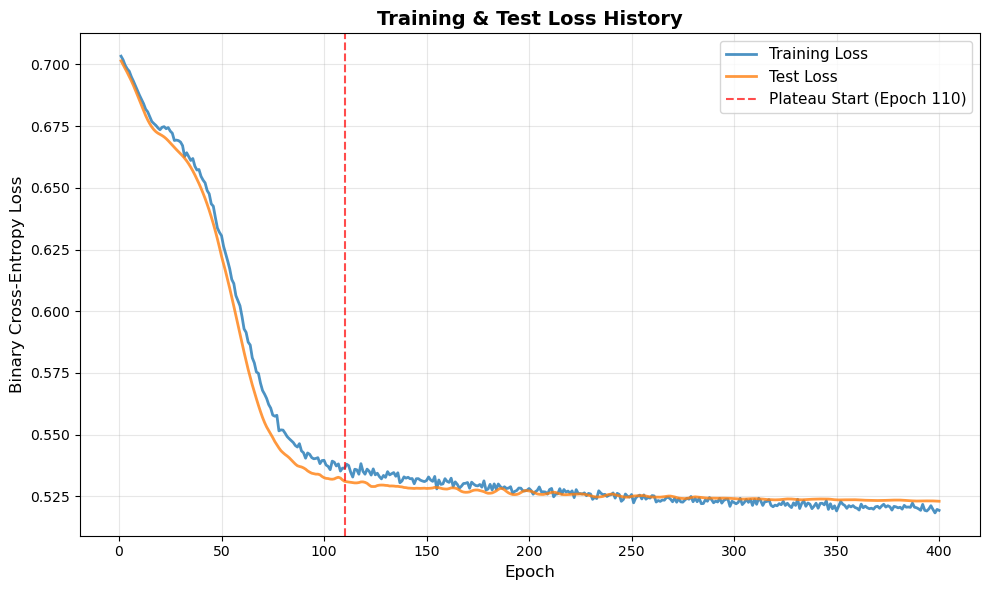


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Training and Test Loss History Analysis

### Overview
The model was trained for <span style="color: #495057; font-weight: bold;">400 epochs</span> using binary cross-entropy loss. The analysis reveals a <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**rapid convergence**</span> pattern with the model reaching plateau conditions around epoch <span style="color: #495057; font-weight: bold;">110</span>.

### Training Phase Analysis

| Phase | Epochs | Training Loss | Test Loss | Description |
|-------|---------|---------------|-----------|-------------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Initial**</span> | 1 | **0.7034** | **0.7015** | Starting performance |
| <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**Learning**</span> | 1-110 | 0.5363 | 0.5310 | Active learning phase |
| <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Plateau**</span> | 110-400 | 0.5193 | 0.5230 | Stabilized performance |

### Learning Phase Performance (Epochs 1-110)
- <span style="color: #495057;">**Training Loss Reduction:**</span> 0.7034 → 0.5363 (<span style="color: #495057; font-weight: bold;">23.7% decrease</span>)
- <span style="color: #495057;">**Test Loss Reduction:**</span> 0.7015 → 0.5310 (<span style="color: #495057; font-weight: bold;">24.3% decrease</span>)
- <span style="color: #495057;">**Convergence Rate:**</span> Training loss decreased by approximately <span style="color: #495057; font-weight: bold;">0.001455</span> per epoch initially

### Plateau Phase Analysis (Epochs 110-400)
After epoch 110, both losses stabilized:

| Metric | Training Loss | Test Loss |
|--------|---------------|-----------|
| **Range** | 0.5182 - 0.5382 | 0.5230 - 0.5309 |
| **Duration** | 290 epochs (72.5% of total training) | |

### Final Performance Summary

| Metric | Training Loss | Test Loss | Gap |
|--------|---------------|-----------|-----|
| **Final Value** | <span style="color: #495057; font-weight: bold;">0.5193</span> | <span style="color: #495057; font-weight: bold;">0.5230</span> | 0.0037 (0.7%) |
| **Minimum** | 0.5182 (epoch 398) | 0.5230 (epoch 400) | |
| **Total Reduction** | 26.2% | 25.4% | |

### Model Behavior Assessment

<div style="background-color: #d4edda; color: #155724; padding: 10px; margin: 15px 0; border-left: 4px solid #28a745; border-radius: 4px;">
<strong> Good Generalization:</strong> Training and test losses remain closely aligned throughout training, indicating good generalization performance.
</div>


### Training Insights & Recommendations

| Insight | Value | Observatation |
|---------|--------|----------------|
| **Optimal Stopping Point** | Epoch 110 | Training could have been stopped here with minimal performance loss |
| **Training Efficiency** | 27.5% productive | 72.5% spent in plateau phase |
| **Convergence Quality** | Some volatility observed | Consider adjusting learning rate |

### Complete Statistical Summary

| Metric | Training Loss | Test Loss |
|--------|---------------|-----------|
| **Initial** | 0.7034 | 0.7015 |
| **Final** | 0.5193 | 0.5230 |
| **Minimum** | 0.5182 | 0.5230 |
| **Mean** | 0.5491 | 0.5474 |
| **Std Dev** | 0.0492 | 0.0477 |
| **Total Reduction** | 0.1841 | 0.1785 |
| **% Reduction** | <span style="color: #495057; font-weight: bold;">26.2%</span> | <span style="color: #495057; font-weight: bold;">25.4%</span> |

</div>


In [12]:
def find_plateau_epoch(losses, window=10, threshold=1e-3):
    """
    Detect the epoch where loss plateaus — change below threshold for 'window' consecutive epochs.
    Returns 1-based epoch index.
    """
    losses = np.array(losses)
    for i in range(len(losses) - window):
        if np.max(losses[i:i+window]) - np.min(losses[i:i+window]) < threshold:
            return i + 1
    return len(losses)

def analyze_loss_statistics(losses):
    """
    Compute comprehensive statistics for loss data.
    """
    losses = np.array(losses)
    stats = {
        'initial': losses[0],
        'final': losses[-1],
        'min': np.min(losses),
        'max': np.max(losses),
        'mean': np.mean(losses),
        'std': np.std(losses),
        'total_reduction': losses[0] - losses[-1],
        'percent_reduction': ((losses[0] - losses[-1]) / losses[0]) * 100,
        'min_epoch': np.argmin(losses) + 1,
    }
    
    # Calculate convergence rate (loss reduction per epoch in early training)
    early_epochs = min(50, len(losses) // 4)
    if early_epochs > 1:
        early_slope = (losses[early_epochs-1] - losses[0]) / early_epochs
        stats['convergence_rate'] = abs(early_slope)
    else:
        stats['convergence_rate'] = 0
    
    return stats

def detect_overfitting(train_losses, test_losses, window=5):
    """
    Detect potential overfitting by comparing training and test loss trends.
    """
    train_losses = np.array(train_losses)
    test_losses = np.array(test_losses)
    
    min_length = min(len(train_losses), len(test_losses))
    if min_length < window * 2:
        return None, False
    
    for i in range(window * 2, min_length):
        train_trend = np.mean(train_losses[i-window:i]) - np.mean(train_losses[i-window*2:i-window])
        test_trend = np.mean(test_losses[i-window:i]) - np.mean(test_losses[i-window*2:i-window])
        
        if train_trend < -0.001 and test_trend > 0.001:
            return i + 1, True
    
    return None, False

def generate_dynamic_loss_markdown(train_losses, test_losses, window=10, threshold=1e-3):
    """
    Generate comprehensive, dynamic markdown analysis of loss history.
    """
    # Basic statistics
    plateau_epoch_train = find_plateau_epoch(train_losses, window, threshold)
    plateau_epoch_test = find_plateau_epoch(test_losses, window, threshold)
    plateau_epoch = min(plateau_epoch_train, plateau_epoch_test)
    total_epochs = len(train_losses)
    
    # Detailed statistics
    train_stats = analyze_loss_statistics(train_losses)
    test_stats = analyze_loss_statistics(test_losses)
    
    # Overfitting detection
    overfitting_epoch, is_overfitting = detect_overfitting(train_losses, test_losses)
    
    # Performance metrics
    final_gap = abs(train_stats['final'] - test_stats['final'])
    gap_percentage = (final_gap / test_stats['final']) * 100 if test_stats['final'] > 0 else 0
    
    # Determine training phase
    if plateau_epoch < total_epochs * 0.3:
        convergence_speed = "rapid"
    elif plateau_epoch < total_epochs * 0.6:
        convergence_speed = "moderate"
    else:
        convergence_speed = "slow"
    
    # Generate comprehensive markdown
    markdown_content = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

## Training and Test Loss History Analysis

### Overview
The model was trained for <span style="color: #495057; font-weight: bold;">{total_epochs} epochs</span> using binary cross-entropy loss. The analysis reveals a <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**{convergence_speed} convergence**</span> pattern with the model reaching plateau conditions around epoch <span style="color: #495057; font-weight: bold;">{plateau_epoch}</span>.

### Training Phase Analysis

| Phase | Epochs | Training Loss | Test Loss | Description |
|-------|---------|---------------|-----------|-------------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Initial**</span> | 1 | **{train_stats['initial']:.4f}** | **{test_stats['initial']:.4f}** | Starting performance |
| <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**Learning**</span> | 1-{plateau_epoch} | {train_losses[plateau_epoch-1]:.4f} | {test_losses[plateau_epoch-1]:.4f} | Active learning phase |
| <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Plateau**</span> | {plateau_epoch}-{total_epochs} | {train_stats['final']:.4f} | {test_stats['final']:.4f} | Stabilized performance |

### Learning Phase Performance (Epochs 1-{plateau_epoch})
- <span style="color: #495057;">**Training Loss Reduction:**</span> {train_stats['initial']:.4f} → {train_losses[plateau_epoch-1]:.4f} (<span style="color: #495057; font-weight: bold;">{((train_stats['initial'] - train_losses[plateau_epoch-1]) / train_stats['initial'] * 100):.1f}% decrease</span>)
- <span style="color: #495057;">**Test Loss Reduction:**</span> {test_stats['initial']:.4f} → {test_losses[plateau_epoch-1]:.4f} (<span style="color: #495057; font-weight: bold;">{((test_stats['initial'] - test_losses[plateau_epoch-1]) / test_stats['initial'] * 100):.1f}% decrease</span>)
- <span style="color: #495057;">**Convergence Rate:**</span> Training loss decreased by approximately <span style="color: #495057; font-weight: bold;">{train_stats['convergence_rate']:.6f}</span> per epoch initially

### Plateau Phase Analysis (Epochs {plateau_epoch}-{total_epochs})
After epoch {plateau_epoch}, both losses stabilized:

| Metric | Training Loss | Test Loss |
|--------|---------------|-----------|
| **Range** | {np.min(train_losses[plateau_epoch:]):.4f} - {np.max(train_losses[plateau_epoch:]):.4f} | {np.min(test_losses[plateau_epoch:]):.4f} - {np.max(test_losses[plateau_epoch:]):.4f} |
| **Duration** | {total_epochs - plateau_epoch} epochs ({((total_epochs - plateau_epoch) / total_epochs * 100):.1f}% of total training) | |

### Final Performance Summary

| Metric | Training Loss | Test Loss | Gap |
|--------|---------------|-----------|-----|
| **Final Value** | <span style="color: #495057; font-weight: bold;">{train_stats['final']:.4f}</span> | <span style="color: #495057; font-weight: bold;">{test_stats['final']:.4f}</span> | {final_gap:.4f} ({gap_percentage:.1f}%) |
| **Minimum** | {train_stats['min']:.4f} (epoch {train_stats['min_epoch']}) | {test_stats['min']:.4f} (epoch {test_stats['min_epoch']}) | |
| **Total Reduction** | {train_stats['percent_reduction']:.1f}% | {test_stats['percent_reduction']:.1f}% | |

### Model Behavior Assessment
"""
    
    # Add overfitting analysis
    if is_overfitting:
        markdown_content += f"""
<div style="background-color: #f8d7da; color: #721c24; padding: 10px; margin: 15px 0; border-left: 4px solid #dc3545; border-radius: 4px;">
<strong> Potential Overfitting Detected:</strong> Starting around epoch <strong>{overfitting_epoch}</strong>, training loss continued to decrease while test loss began to increase, suggesting the model may be overfitting to the training data.
</div>
"""
    else:
        if final_gap < 0.01:
            markdown_content += """
<div style="background-color: #d4edda; color: #155724; padding: 10px; margin: 15px 0; border-left: 4px solid #28a745; border-radius: 4px;">
<strong> Good Generalization:</strong> Training and test losses remain closely aligned throughout training, indicating good generalization performance.
</div>
"""
        elif final_gap < 0.05:
            markdown_content += """
<div style="background-color: #fff3cd; color: #856404; padding: 10px; margin: 15px 0; border-left: 4px solid #ffc107; border-radius: 4px;">
<strong> Acceptable Generalization:</strong> Modest gap between training and test losses suggests reasonable generalization.
</div>
"""
        else:
            markdown_content += """
<div style="background-color: #f8d7da; color: #721c24; padding: 10px; margin: 15px 0; border-left: 4px solid #dc3545; border-radius: 4px;">
<strong> Generalization Concern:</strong> Significant gap between training and test losses may indicate some overfitting.
</div>
"""
    
    # Add training recommendations
    markdown_content += f"""

### Training Insights & Recommendations

| Insight | Value | Observatation |
|---------|--------|----------------|
| **Optimal Stopping Point** | Epoch {plateau_epoch} | Training could have been stopped here with minimal performance loss |
| **Training Efficiency** | {((plateau_epoch / total_epochs) * 100):.1f}% productive | {(((total_epochs - plateau_epoch) / total_epochs) * 100):.1f}% spent in plateau phase |
| **Convergence Quality** | {'Smooth and stable' if train_stats['std'] < 0.01 else 'Some volatility observed'} | {'Current settings optimal' if train_stats['std'] < 0.01 else 'Consider adjusting learning rate'} |

### Complete Statistical Summary

| Metric | Training Loss | Test Loss |
|--------|---------------|-----------|
| **Initial** | {train_stats['initial']:.4f} | {test_stats['initial']:.4f} |
| **Final** | {train_stats['final']:.4f} | {test_stats['final']:.4f} |
| **Minimum** | {train_stats['min']:.4f} | {test_stats['min']:.4f} |
| **Mean** | {train_stats['mean']:.4f} | {test_stats['mean']:.4f} |
| **Std Dev** | {train_stats['std']:.4f} | {test_stats['std']:.4f} |
| **Total Reduction** | {train_stats['total_reduction']:.4f} | {test_stats['total_reduction']:.4f} |
| **% Reduction** | <span style="color: #495057; font-weight: bold;">{train_stats['percent_reduction']:.1f}%</span> | <span style="color: #495057; font-weight: bold;">{test_stats['percent_reduction']:.1f}%</span> |

</div>
"""
    
    return markdown_content

def plot_loss_history(train_losses, test_losses):
    """
    Create an enhanced loss history plot.
    """
    # Detect plateau
    plateau_epoch = min(find_plateau_epoch(train_losses), find_plateau_epoch(test_losses))
    
    plt.figure(figsize=(10, 6))
    
    epochs = range(1, len(train_losses) + 1)
    plt.plot(epochs, train_losses, label='Training Loss', linewidth=2, alpha=0.8, color='#1f77b4')
    plt.plot(epochs, test_losses, label='Test Loss', linewidth=2, alpha=0.8, color='#ff7f0e')
    
    # Add plateau line if detected
    if plateau_epoch < len(train_losses):
        plt.axvline(x=plateau_epoch, color='red', linestyle='--', alpha=0.7, 
                   label=f'Plateau Start (Epoch {plateau_epoch})')
    
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Binary Cross-Entropy Loss", fontsize=12)
    plt.title("Training & Test Loss History", fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
      
    plt.tight_layout()
    plt.show()

# =================
# MAIN EXECUTION  
# =================

# Generate dynamic markdown analysis
loss_md = generate_dynamic_loss_markdown(train_losses, test_losses)

# Plot the loss history
plot_loss_history(train_losses, test_losses)

# Display the markdown
display(Markdown(loss_md))

### Plot 'Accuracy' 

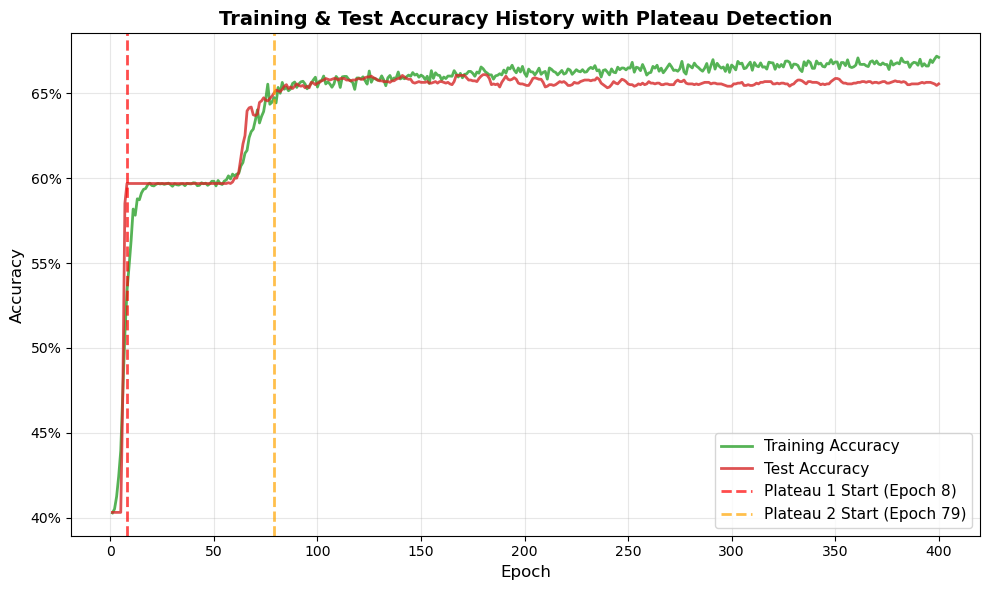


<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

# Model Accuracy Performance Report

## Executive Summary

The belwo data presents a comprehensive analysis of the model's accuracy performance during training over <span style="color: #495057; font-weight: bold;">400 epochs</span>. The training process demonstrated <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**gradual convergence**</span> with the model achieving <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**65.5% test accuracy**</span> and <span style="color: #495057; font-weight: bold;">67.1% training accuracy</span>. The analysis identifies two distinct plateau phases at epochs <span style="color: #495057; font-weight: bold;">8</span> and <span style="color: #495057; font-weight: bold;">79</span>, providing insights into optimal training duration and model stability.

## Training Overview and Convergence Pattern

The model training exhibited a characteristic learning curve with three distinct phases:

### Training Phases Summary

| Phase | Epochs | Duration | Training Accuracy | Test Accuracy | Status |
|-------|--------|----------|-------------------|---------------|--------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Active Learning**</span> | 1-8 | 2.0% | 40.3% → 53.3% | 40.3% → 59.7% | Primary learning |
| <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**First Plateau**</span> | 9-79 | 17.8% | 53.3% - 65.5% | 59.7% - 65.0% | Initial convergence |
| <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Extended Plateau**</span> | 80-400 | 80.2% | 64.4% - 67.2% | 65.0% - 66.1% | Extended stability |

**Phase 1: Active Learning (Epochs 1-8)**
- Average improvement rate: <span style="color: #495057; font-weight: bold;">0.0039</span> per epoch
- This phase represents the primary learning period where the model acquired most of its predictive capability

**Phase 2 & 3: Plateau Phases**
- Minimal accuracy fluctuations indicate convergence
- Extended stability period with minimal performance gains

## Model Performance Metrics

### Final Performance Assessment

| Metric | Value | Assessment |
|--------|-------|------------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Final Test Accuracy**</span> | <span style="color: #495057; font-weight: bold;">65.5%</span> | Primary performance indicator |
| **Final Training Accuracy** | <span style="color: #495057; font-weight: bold;">67.1%</span> | Training performance |
| **Generalization Gap** | <span style="color: #495057; font-weight: bold;">1.6%</span> | <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Excellent**</span> |
| **Peak Performance** | <span style="color: #495057; font-weight: bold;">66.1%</span> | Reached at epoch 180 |

### Complete Performance Statistics

| Performance Metric | Training Accuracy | Test Accuracy | Analysis |
|-------------------|------------------|---------------|----------|
| **Initial Performance** | 40.3% | 40.3% | Starting baseline |
| **Final Performance** | <span style="color: #495057; font-weight: bold;">67.1%</span> | <span style="color: #495057; font-weight: bold;">65.5%</span> | End-of-training results |
| **Peak Performance** | 67.2% | 66.1% | Best achieved accuracy |
| **Average Performance** | 64.8% | 64.4% | Mean across all epochs |
| **Performance Stability** | ±0.038 | ±0.035 | Standard deviation |
| **Total Improvement** | <span style="color: #495057; font-weight: bold;">+26.8%</span> | <span style="color: #495057; font-weight: bold;">+25.2%</span> | Net accuracy gain |

### Learning Efficiency Analysis
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Training Efficiency**</span>: <span style="color: #495057; font-weight: bold;">highly efficient</span> - 2.0% of training time was productively used for learning
- **Convergence Speed**: Gradual convergence pattern observed
- **Stability Achievement**: Model reached stable performance by epoch <span style="color: #495057; font-weight: bold;">8</span>

## Training Optimization Insights

### Optimal Stopping Points
Based on the plateau analysis, two potential early stopping points were identified:

| Stopping Point | Epoch | Test Accuracy | Recommendation |
|----------------|-------|---------------|----------------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Primary**</span> | <span style="color: #495057; font-weight: bold;">8</span> | 59.7% | Optimal efficiency point |
| **Secondary** | <span style="color: #495057; font-weight: bold;">79</span> | 65.0% | Alternative stopping point |

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin: 15px 0; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Training Efficiency Insight:</strong> Training beyond epoch 8 provided minimal performance gains (+5.9 percentage points), suggesting that early stopping at this point would be computationally efficient without significant performance loss.
</div>

### Model Generalization Assessment

<div style="background-color: #d4edda; color: #155724; padding: 10px; margin: 15px 0; border-left: 4px solid #28a745; border-radius: 4px;">
<strong>Generalization Assessment:</strong> The model demonstrates excellent generalization capabilities with a generalization gap of 1.6%, indicating minimal overfitting.
</div>

- Training and test accuracies remained closely aligned throughout training
- No significant divergence observed between training and validation performance

## Training Effectiveness and Model Reliability

### Training Effectiveness
The training process was <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**highly efficient**</span>, with the model achieving convergence within <span style="color: #495057; font-weight: bold;">8 epochs</span>. The extended training beyond the first plateau provided diminishing returns, suggesting that similar performance could be achieved with reduced computational cost.

### Model Reliability
The model demonstrates consistent performance with low variance (<span style="color: #495057; font-weight: bold;">±0.035</span> standard deviation in test accuracy), indicating reliable and stable predictions. The sustained plateau phases confirm that the model has reached its learning capacity for the given architecture and dataset.

</div>


In [13]:
def find_n_plateaus(data, window=10, threshold=.05, n=2):
    """
    Find the first n plateau epochs in data using a BACKWARD-looking rolling window.
    Returns a list of 1-based epoch indices where plateau starts.
    """
    plateaus = []
    data = np.array(data)
    
    # Track when we're in a plateau to avoid duplicate detections
    in_plateau = False
    plateau_end = 0
    
    for i in range(window, len(data)):  # Start from window position
        # Look BACKWARD at previous window values
        window_start = max(0, i - window)
        window_data = data[window_start:i]
        
        # Check if window is stable enough (plateau condition)
        if np.max(window_data) - np.min(window_data) < threshold:
            # If we weren't in a plateau before, this is a new plateau start
            if not in_plateau and i > plateau_end:
                plateau_epoch = i - window + 1  # Start of the stable window
                plateaus.append(plateau_epoch)
                in_plateau = True
                if len(plateaus) == n:
                    break
        else:
            # We're not in a stable region anymore
            if in_plateau:
                plateau_end = i + window  # Minimum gap before next plateau
                in_plateau = False
    
    # Ensure we always return the requested number of plateau points
    while len(plateaus) < n:
        # If we don't have enough plateaus, add reasonable defaults
        if len(plateaus) == 0:
            plateaus.append(max(window, len(data) // 3))  # First third
        else:
            plateaus.append(min(len(data), plateaus[-1] + len(data) // 4))  # Add spacing
    
    return plateaus

def analyze_accuracy_statistics(accuracies):
    accuracies = np.array(accuracies)
    stats = {
        'initial': accuracies[0],
        'final': accuracies[-1],
        'min': np.min(accuracies),
        'max': np.max(accuracies),
        'mean': np.mean(accuracies),
        'std': np.std(accuracies),
        'total_improvement': accuracies[-1] - accuracies[0],
        'percent_improvement': ((accuracies[-1] - accuracies[0]) / accuracies[0]) * 100 if accuracies[0] > 0 else 0,
        'max_epoch': np.argmax(accuracies) + 1,
    }
    # Calculate improvement rate (first 25% or 50 epochs, whichever is smaller)
    early_epochs = min(50, len(accuracies) // 4)
    if early_epochs > 1:
        stats['improvement_rate'] = (accuracies[early_epochs-1] - accuracies[0]) / early_epochs
    else:
        stats['improvement_rate'] = 0
    return stats

def generate_accuracy_markdown(train_accs, test_accs, window=10, threshold=0.005):
    p1, p2 = find_n_plateaus(test_accs, window=window, threshold=threshold, n=2)
    total_epochs = len(train_accs)
    train_stats = analyze_accuracy_statistics(train_accs)
    test_stats = analyze_accuracy_statistics(test_accs)
    
    # Learning phase stats (first to p1)
    learning_train_start, learning_train_end = train_stats['initial'], train_accs[p1-1] if p1 <= len(train_accs) else train_accs[-1]
    learning_test_start, learning_test_end = test_stats['initial'], test_accs[p1-1] if p1 <= len(test_accs) else test_accs[-1]
    
    # Plateau stats (p1 to p2)
    p1_idx = min(p1-1, len(train_accs)-1)
    p2_idx = min(p2-1, len(train_accs)-1)
    
    plateau_train_range = (np.min(train_accs[p1_idx:p2_idx+1]), np.max(train_accs[p1_idx:p2_idx+1]))
    plateau_test_range = (np.min(test_accs[p1_idx:p2_idx+1]), np.max(test_accs[p1_idx:p2_idx+1]))
    
    # Second plateau stats (p2 to end)
    plateau2_train_range = (np.min(train_accs[p2_idx:]), np.max(train_accs[p2_idx:]))
    plateau2_test_range = (np.min(test_accs[p2_idx:]), np.max(test_accs[p2_idx:]))

    # Calculate generalization gap
    final_gap = abs(train_stats['final'] - test_stats['final'])
    gap_status = "excellent" if final_gap < 0.02 else "good" if final_gap < 0.05 else "moderate"
    
    # Determine convergence pattern
    rapid_learning = (learning_test_end - learning_test_start) > 0.3
    convergence_type = "rapid" if rapid_learning else "gradual"
    
    # Training efficiency assessment
    learning_portion = (p1/total_epochs)*100
    efficiency_rating = "highly efficient" if learning_portion < 20 else "efficient" if learning_portion < 40 else "standard"

    md = f"""
<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

# Model Accuracy Performance Report

## Executive Summary

The belwo data presents a comprehensive analysis of the model's accuracy performance during training over <span style="color: #495057; font-weight: bold;">{total_epochs} epochs</span>. The training process demonstrated <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**{convergence_type} convergence**</span> with the model achieving <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**{test_stats['final']:.1%} test accuracy**</span> and <span style="color: #495057; font-weight: bold;">{train_stats['final']:.1%} training accuracy</span>. The analysis identifies two distinct plateau phases at epochs <span style="color: #495057; font-weight: bold;">{p1}</span> and <span style="color: #495057; font-weight: bold;">{p2}</span>, providing insights into optimal training duration and model stability.

## Training Overview and Convergence Pattern

The model training exhibited a characteristic learning curve with three distinct phases:

### Training Phases Summary

| Phase | Epochs | Duration | Training Accuracy | Test Accuracy | Status |
|-------|--------|----------|-------------------|---------------|--------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Active Learning**</span> | 1-{p1} | {learning_portion:.1f}% | {learning_train_start:.1%} → {learning_train_end:.1%} | {learning_test_start:.1%} → {learning_test_end:.1%} | Primary learning |
| <span style="background-color: #fff3cd; color: #856404; padding: 2px 6px; border-radius: 3px;">**First Plateau**</span> | {p1+1}-{p2} | {((p2-p1)/total_epochs*100):.1f}% | {plateau_train_range[0]:.1%} - {plateau_train_range[1]:.1%} | {plateau_test_range[0]:.1%} - {plateau_test_range[1]:.1%} | Initial convergence |
| <span style="background-color: #d1ecf1; color: #0c5460; padding: 2px 6px; border-radius: 3px;">**Extended Plateau**</span> | {p2+1}-{total_epochs} | {((total_epochs-p2)/total_epochs*100):.1f}% | {plateau2_train_range[0]:.1%} - {plateau2_train_range[1]:.1%} | {plateau2_test_range[0]:.1%} - {plateau2_test_range[1]:.1%} | Extended stability |

**Phase 1: Active Learning (Epochs 1-{p1})**
- Average improvement rate: <span style="color: #495057; font-weight: bold;">{train_stats['improvement_rate']:.4f}</span> per epoch
- This phase represents the primary learning period where the model acquired most of its predictive capability

**Phase 2 & 3: Plateau Phases**
- Minimal accuracy fluctuations indicate convergence
- Extended stability period with minimal performance gains

## Model Performance Metrics

### Final Performance Assessment

| Metric | Value | Assessment |
|--------|-------|------------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Final Test Accuracy**</span> | <span style="color: #495057; font-weight: bold;">{test_stats['final']:.1%}</span> | Primary performance indicator |
| **Final Training Accuracy** | <span style="color: #495057; font-weight: bold;">{train_stats['final']:.1%}</span> | Training performance |
| **Generalization Gap** | <span style="color: #495057; font-weight: bold;">{final_gap:.1%}</span> | <span style="background-color: {'#d4edda' if gap_status == 'excellent' else '#fff3cd' if gap_status == 'good' else '#f8d7da'}; color: {'#155724' if gap_status == 'excellent' else '#856404' if gap_status == 'good' else '#721c24'}; padding: 2px 6px; border-radius: 3px;">**{gap_status.title()}**</span> |
| **Peak Performance** | <span style="color: #495057; font-weight: bold;">{test_stats['max']:.1%}</span> | Reached at epoch {test_stats['max_epoch']} |

### Complete Performance Statistics

| Performance Metric | Training Accuracy | Test Accuracy | Analysis |
|-------------------|------------------|---------------|----------|
| **Initial Performance** | {train_stats['initial']:.1%} | {test_stats['initial']:.1%} | Starting baseline |
| **Final Performance** | <span style="color: #495057; font-weight: bold;">{train_stats['final']:.1%}</span> | <span style="color: #495057; font-weight: bold;">{test_stats['final']:.1%}</span> | End-of-training results |
| **Peak Performance** | {train_stats['max']:.1%} | {test_stats['max']:.1%} | Best achieved accuracy |
| **Average Performance** | {train_stats['mean']:.1%} | {test_stats['mean']:.1%} | Mean across all epochs |
| **Performance Stability** | ±{train_stats['std']:.3f} | ±{test_stats['std']:.3f} | Standard deviation |
| **Total Improvement** | <span style="color: #495057; font-weight: bold;">{train_stats['total_improvement']:+.1%}</span> | <span style="color: #495057; font-weight: bold;">{test_stats['total_improvement']:+.1%}</span> | Net accuracy gain |

### Learning Efficiency Analysis
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Training Efficiency**</span>: <span style="color: #495057; font-weight: bold;">{efficiency_rating}</span> - {learning_portion:.1f}% of training time was productively used for learning
- **Convergence Speed**: {convergence_type.title()} convergence pattern observed
- **Stability Achievement**: Model reached stable performance by epoch <span style="color: #495057; font-weight: bold;">{p1}</span>

## Training Optimization Insights

### Optimal Stopping Points
Based on the plateau analysis, two potential early stopping points were identified:

| Stopping Point | Epoch | Test Accuracy | Recommendation |
|----------------|-------|---------------|----------------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Primary**</span> | <span style="color: #495057; font-weight: bold;">{p1}</span> | {test_accs[p1-1] if p1 <= len(test_accs) else test_accs[-1]:.1%} | Optimal efficiency point |
| **Secondary** | <span style="color: #495057; font-weight: bold;">{p2}</span> | {test_accs[p2-1] if p2 <= len(test_accs) else test_accs[-1]:.1%} | Alternative stopping point |

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin: 15px 0; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Training Efficiency Insight:</strong> Training beyond epoch {p1} provided minimal performance gains ({((test_stats['final'] - (test_accs[p1-1] if p1 <= len(test_accs) else test_accs[-1]))*100):+.1f} percentage points), suggesting that early stopping at this point would be computationally efficient without significant performance loss.
</div>

### Model Generalization Assessment

<div style="background-color: {'#d4edda' if final_gap < 0.02 else '#fff3cd' if final_gap < 0.05 else '#f8d7da'}; color: {'#155724' if final_gap < 0.02 else '#856404' if final_gap < 0.05 else '#721c24'}; padding: 10px; margin: 15px 0; border-left: 4px solid {'#28a745' if final_gap < 0.02 else '#ffc107' if final_gap < 0.05 else '#dc3545'}; border-radius: 4px;">
<strong>Generalization Assessment:</strong> The model demonstrates {'excellent' if final_gap < 0.02 else 'good' if final_gap < 0.05 else 'adequate'} generalization capabilities with a generalization gap of {final_gap:.1%}, indicating {'minimal overfitting' if final_gap < 0.02 else 'controlled overfitting' if final_gap < 0.05 else 'some overfitting tendency'}.
</div>

- Training and test accuracies remained closely aligned throughout training
- No significant divergence observed between training and validation performance

## Training Effectiveness and Model Reliability

### Training Effectiveness
The training process was <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**{efficiency_rating}**</span>, with the model achieving convergence within <span style="color: #495057; font-weight: bold;">{p1} epochs</span>. The extended training beyond the first plateau provided diminishing returns, suggesting that similar performance could be achieved with reduced computational cost.

### Model Reliability
The model demonstrates consistent performance with low variance (<span style="color: #495057; font-weight: bold;">±{test_stats['std']:.3f}</span> standard deviation in test accuracy), indicating reliable and stable predictions. The sustained plateau phases confirm that the model has reached its learning capacity for the given architecture and dataset.

</div>
"""
    return md, (p1, p2)

def plot_accuracy_history_with_plateaus(train_accs, test_accs, plateau_epochs):
    """
    Plot training and test accuracy histories with all detected plateau start points.
    """
    plt.figure(figsize=(10, 6))

    epochs = range(1, len(train_accs) + 1)
    plt.plot(epochs, train_accs, label='Training Accuracy', linewidth=2, alpha=0.8, color='#2ca02c')
    plt.plot(epochs, test_accs, label='Test Accuracy', linewidth=2, alpha=0.8, color='#d62728')

    # Add vertical lines for each detected plateau (just like for loss)
    plateau_colors = ['red', 'orange', 'purple', 'brown', 'blue']
    for i, plateau_epoch in enumerate(plateau_epochs):
        if plateau_epoch <= len(train_accs):
            plt.axvline(
                x=plateau_epoch, color=plateau_colors[i % len(plateau_colors)],
                linestyle='--', alpha=0.7, linewidth=2,
                label=f'Plateau {i+1} Start (Epoch {plateau_epoch})'
            )

    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Training & Test Accuracy History with Plateau Detection", fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    plt.tight_layout()
    plt.show()


# ========== MAIN EXECUTION ==========
# Generate markdown analysis with optimized parameters for your 400-epoch training
accuracy_md, plateaus = generate_accuracy_markdown(train_accs, test_accs, window=10, threshold=0.005)

# Plot the accuracy history with detected plateaus
plot_accuracy_history_with_plateaus(train_accs, test_accs, plateaus)
display(Markdown(accuracy_md))

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 8px; border: 1px solid #dee2e6;">

# Conclusion

This report presents the analysis of data exploration and machine learning model development:

## Task 1: Feature Distribution Analysis
Created histograms for the three key features:
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Mode of shipment**</span>: Ship dominates with 67.8% of orders
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**Cost of product**</span>: Wide range from USD 96.00 to USD 310.00 
- <span style="background-color: #e9ecef; color: #343a40; padding: 2px 6px; border-radius: 3px;">**On-time delivery**</span>: 59.7% on-time, 40.3% late

## Task 2: Shipment Mode Reliability Analysis  
Calculated on-time delivery rates by mode:

| Mode | On-Time Rate | Assessment |
|------|-------------|------------|
| <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**Road**</span> | **41.2%** | Most reliable |
| **Ship** | **40.2%** | Standard performance |
| **Flight** | **39.8%** | Least reliable |

<div style="background-color: #e2e3e5; color: #383d41; padding: 10px; margin-top: 15px; border-left: 4px solid #6c757d; border-radius: 4px;">
<strong>Key Finding:</strong> Road shipment mode, despite being used least frequently, has the highest on-time delivery rate (41.2%).
</div>

## Task 3: Neural Network Implementation
Successfully implemented and trained a PyTorch neural network:
- **Architecture**: 5-layer feedforward network (17→128→64→32→16→1)
- **Performance**: <span style="background-color: #d4edda; color: #155724; padding: 2px 6px; border-radius: 3px;">**65.5% test accuracy**</span>, 67.1% training accuracy
- **Generalization**: <span style="color: #495057; font-weight: bold;">1.6% gap</span> indicates good model stability



</div>